### **Visualizing Rosenbrock function contours**

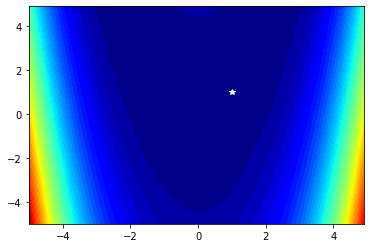

In [1]:
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
 
# objective function (Rosenbrock)
def objective(x, y):
 return ((1 - x)**2) + (100*((y - x**2)**2))
 
# range for input
r_min, r_max = -5.0, 5.0
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# define the known function optima
optima_x = [1, 1]
pyplot.plot([optima_x[0]], [optima_x[1]], '*', color='white')
pyplot.show()

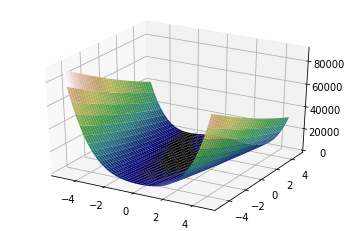

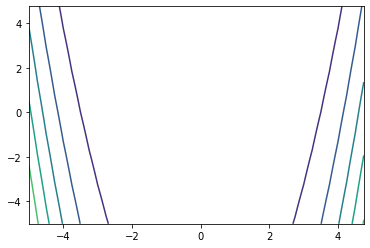

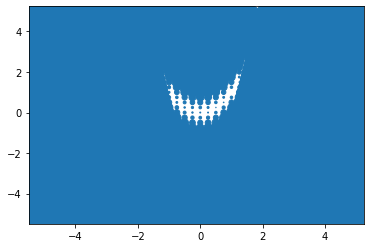

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
z = ((1 - x)**2) + (100*((y - x**2)**2))
surface = ax.plot_surface(x, y, z, cmap='gist_earth')
plt.show()
plt.contour(x,y,z)
plt.show()
plt.scatter(x, y, z)
plt.show()

Another way to visualize the contours 

solution 2


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

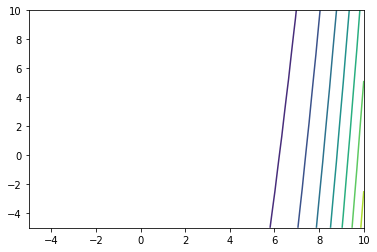

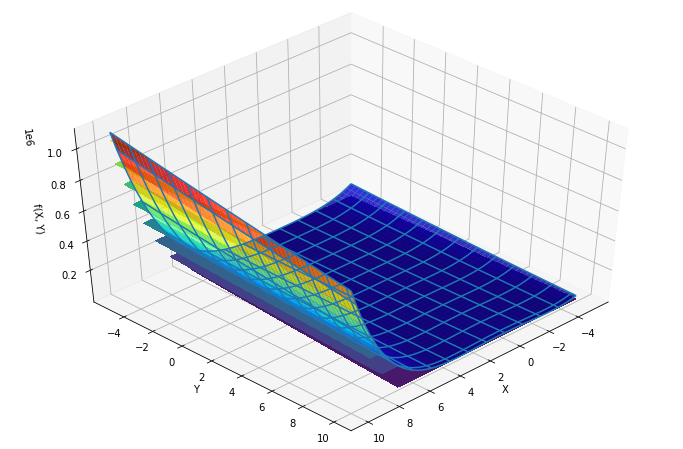

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
def f(x1, x2): return 100*(x2-x1**2)**2+(x1-1)**2
x1 = np.linspace(-5, 10)
x2 = np.linspace(-5, 10)
X1, X2 = np.meshgrid(x1, x2)
F = f(x1, x2)
plt.contour(X1, X2, f(X1, X2))

def plotter(E, A):
  fig = plt.figure(figsize = [12, 8])
  ax = plt.axes(projection='3d')
  ax.plot_surface(X1, X2, f(X1, X2), cmap='jet', alpha=0.8)
  ax.plot_wireframe(X1, X2, f(X1, X2), rcount=15, ccount=15)
  ax.view_init(elev=E, azim=A)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('f(X, Y)')
  ax.contourf(x1, x2, f(X1, X2))
  print("solution 2")
plotter(45, 45)
from ipywidgets import interactive
iplot = interactive(plotter, E = (-90, 90, 5),
                             A = (-90, 90, 5))
iplot

In [4]:
optimum = np.array([1, 1])
optimum = optimum.reshape(-1, 1)

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

### **1) Normal (Vanilla) SGD**

In [6]:
#Normal (Vanilla) SGD
import numpy as np
def DerrivRosenbrock1 ( point ):
    dx = (-2*(1 - point[0]) - 400*point[0]*(point[1] - (point[0]**2)))
    dy = 200*(point[1] - (point[0]**2))
    return dx, dy

    # set the learning rate first
lrate = 0.002
    # initialize a point
a = np.array([-.5, .2])
path_sgd = [a]
    # set number of epochs (can be changed as you want)
epoch = 10000
    # record all tuples of the points and its function
ai = []
for i in range(epoch):
        # objective function
    f = ((1 - a[0])**2) + (100*((a[1] - a[0]**2)**2))
        # append the point and its obj function to ai as 1D list
    ai.append([a,f])
        # Derrivative
    fi = np.array(DerrivRosenbrock1(a))
        # set the new point using the update rule
    a = a - np.dot(lrate,fi)
    path_sgd.append(a)

path_sgd = np.array(path_sgd).T    
    # convert ai into a numpy array
ai = np.array(ai)
    # print the last 10 of ai
print(ai[-10:-1])
    # the minimum value of the function is just the last element of ai
print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')


[[array([0.99988655, 0.99977265]) 1.2892298063154425e-08]
 [array([0.99988664, 0.99977283]) 1.2871707844969201e-08]
 [array([0.99988673, 0.99977302]) 1.285115051427296e-08]
 [array([0.99988682, 0.9997732 ]) 1.2830626018537122e-08]
 [array([0.99988691, 0.99977338]) 1.2810134305321329e-08]
 [array([0.999887  , 0.99977356]) 1.2789675322253845e-08]
 [array([0.99988709, 0.99977374]) 1.2769249017025711e-08]
 [array([0.99988718, 0.99977392]) 1.27488553374618e-08]
 [array([0.99988727, 0.9997741 ]) 1.272849423144423e-08]]
the minimum is: 1.27081656469287e-08 at point: [0.99988736 0.99977428]


<ipython-input-6-be6823db7cc4>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ai = np.array(ai)


**2) Momentum SGD**

In [7]:
# Momentum
import numpy as np
def DerrivRosenbrock1 ( point ):
    dx = (-2*(1 - point[0]) - 400*point[0]*(point[1] - (point[0]**2)))
    dy = 200*(point[1] - (point[0]**2))
    return dx, dy

    # set the learning rate first
lrate = 0.003
    # initialize a point
a = np.array([-.5, .2])
path_mom = [a]
    # set number of epochs (can be changed as you want)
epoch = 1400
    # record all tuples of the points and its function
ai = []
previous_update = np.array([0, 0])
momentum_coeff = 0.6
for i in range(epoch):
        # objective function
    f = ((1 - a[0])**2) + (100*((a[1] - a[0]**2)**2))
        # append the point and its obj function to ai as 1D list
    ai.append([a,f])
        # Derrivative
    fi = np.array(DerrivRosenbrock1(a))
        # set the new point using the update rule of momentum equations
    update = - np.dot(lrate,fi) + momentum_coeff * previous_update
    a = a  + update
    previous_update = update
    path_mom.append(a)

path_mom = np.array(path_mom).T    
    # convert ai into a numpy array
ai = np.array(ai)
    # print the last 10 of ai
print(ai[-10:-1])
    # the minimum value of the function is just the last element of ai
print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')


[[array([0.99495886, 0.9899229 ]) 2.5454030979095995e-05]
 [array([0.99497415, 0.98995339]) 2.529984309676913e-05]
 [array([0.9949894 , 0.98998379]) 2.514659298208909e-05]
 [array([0.99500459, 0.99001409]) 2.499427489720721e-05]
 [array([0.99501975, 0.99004431]) 2.4842883139695648e-05]
 [array([0.99503485, 0.99007443]) 2.4692412042325674e-05]
 [array([0.99504991, 0.99010446]) 2.454285597284992e-05]
 [array([0.99506492, 0.9901344 ]) 2.439420933378157e-05]
 [array([0.99507989, 0.99016424]) 2.4246466562176878e-05]]
the minimum is: 2.409962212942036e-05 at point: [0.99509481 0.990194  ]


<ipython-input-7-061c3109af45>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ai = np.array(ai)


### **3) Adagrad SGD**

In [8]:
#Adagrad
import numpy as np
def DerrivRosenbrock1 ( point ):
    dx = (-2*(1 - point[0]) - 400*point[0]*(point[1] - (point[0]**2)))
    dy = 200*(point[1] - (point[0]**2))
    return dx, dy

    # set the learning rate first
lrate = 0.1
    # initialize a point
a = np.array([-.5, .2])
path_adagrad = [a]
    # set number of epochs (can be changed as you want)
epoch = 4000
    # record all tuples of the points and its function
ai = []
cum_grad = np.array([0, 0])
for i in range(epoch):
        # objective function
    f = ((1 - a[0])**2) + (100*((a[1] - a[0]**2)**2))
        # append the point and its obj function to ai as 1D list
    ai.append([a,f])
        # Derrivative
    fi = np.array(DerrivRosenbrock1(a))
        # set the new point using update rules of adagrad equations
    cum_grad = cum_grad + fi**2 
    update = - np.dot(lrate,fi) / (np.sqrt(cum_grad) + 1e-6)
    a = a  + update
    path_adagrad.append(a)

path_adagrad = np.array(path_adagrad).T    
    # convert ai into a numpy array
ai = np.array(ai)
    # print the last 10 of ai
print(ai[-10:-1])
    # the minimum value of the function is just the last element of ai
print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')


[[array([0.99354709, 0.98825403]) 0.00016668149973464783]
 [array([0.9943984, 0.9877085]) 0.00015674491990271363]
 [array([0.99359021, 0.98825473]) 0.00014784252453139973]
 [array([0.99437847, 0.98775068]) 0.0001393166812240733]
 [array([0.99363099, 0.98825698]) 0.00013166016123434645]
 [array([0.99436079, 0.98779137]) 0.00012434777451406383]
 [array([0.99366958, 0.98826067]) 0.00011776632450828843]
 [array([0.99434523, 0.98783069]) 0.00011149637782931187]
 [array([0.99370614, 0.9882657 ]) 0.00010584123471829714]]
the minimum is: 0.00010046587245414438 at point: [0.99433161 0.98786871]


<ipython-input-8-038cfb664fdf>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ai = np.array(ai)


*Rosenbrock Solution Paths Animation*

In [9]:
from itertools import zip_longest
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [10]:
paths = [path_sgd, path_mom, path_adagrad]

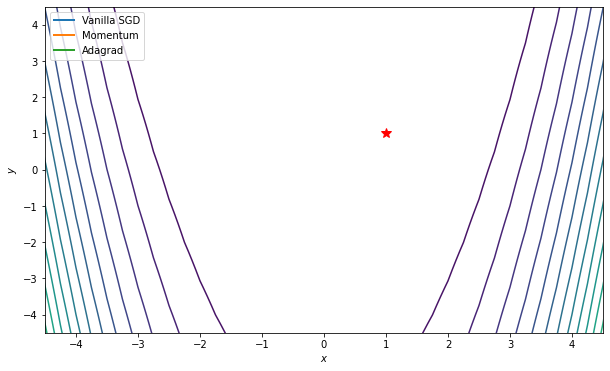

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=20)
ax.plot(*optimum, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=['Vanilla SGD', 'Momentum', 'Adagrad'], ax=ax)

ax.legend(loc='upper left')

In [12]:
HTML(anim.to_html5_video())

*Styblinski Function Contours*

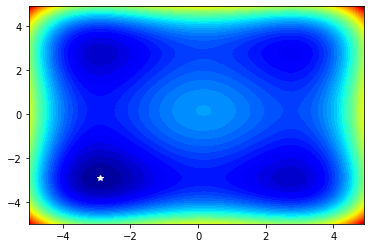

In [13]:
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
 
# objective function (Styblinski-Tang)
def objective(x, y):
 return 0.5 * ((x**4 + y**4) - 16 * (x**2 + y**2)+ 5 * (x + y))
 
# range for input
r_min, r_max = -5.0, 5.0
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# define the known function optima
optima_x = [-2.903534, -2.903534]
pyplot.plot([optima_x[0]], [optima_x[1]], '*', color='white')
pyplot.show()

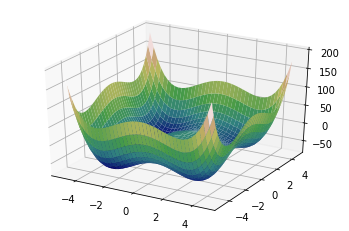

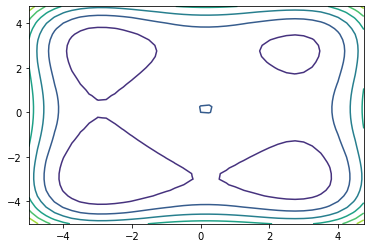

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


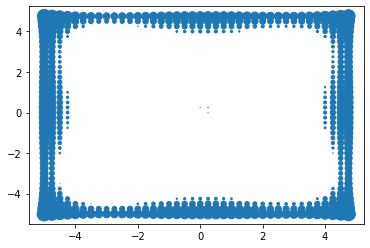

In [14]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
z = 0.5 * ((x**4 + y**4) - 16 * (x**2 + y**2)+ 5 * (x + y))
surface = ax.plot_surface(x, y, z, cmap='gist_earth')
plt.show()
plt.contour(x,y,z)
plt.show()
plt.scatter(x, y, z)
plt.show()

Define the minima which we know 

In [15]:
optimum = np.array([-2.90353403, -2.90353403])
optimum = optimum.reshape(-1, 1)

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

*Vanilla SGD*

In [17]:
#Normal (Vanilla) SGD
import numpy as np
def sty_tang_deriv ( point ):
    dx = 0.5 * (4*point[0]**3 - 32 *point[0] + 5)
    dy = 0.5 * (4*point[1]**3 - 32 *point[1] + 5)
    return dx, dy

    # set the learning rate first
lrate = 0.01
    # initialize a point
a = np.array([-0.5, 0.1])
path_sgd = [a]
    # set number of epochs (can be changed as you want)
epoch = 100
    # we have to record all tuples of the points and its function
ai = []
for i in range(epoch):
        # objective function
    f = 0.5 * ((a[0]**4 + a[1]**4) - 16 * (a[0]**2 + a[1]**2)+ 5 * (a[0] + a[1]))
        # append the point and its obj function to ai as 1D list
    ai.append([a,f])
        # Derrivative
    fi = np.array(sty_tang_deriv(a))
        # set the new point based on its 
    a = a - np.dot(lrate,fi)
    path_sgd.append(a)
    
    # convert ai into a numpy array
path_sgd = np.array(path_sgd).T
ai = np.array(ai)
    # print(ai.shape) 'uncomment this to check ai shape and delete this sentences'
    # print the last 10 of ai
print(ai[-10:-1])
    # the minimum value of the function is just the last element of ai
print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')


[[array([-2.90353403, -2.90353403]) -78.33233140754282]
 [array([-2.90353403, -2.90353403]) -78.33233140754282]
 [array([-2.90353403, -2.90353403]) -78.33233140754284]
 [array([-2.90353403, -2.90353403]) -78.33233140754282]
 [array([-2.90353403, -2.90353403]) -78.33233140754284]
 [array([-2.90353403, -2.90353403]) -78.33233140754282]
 [array([-2.90353403, -2.90353403]) -78.33233140754282]
 [array([-2.90353403, -2.90353403]) -78.33233140754284]
 [array([-2.90353403, -2.90353403]) -78.33233140754284]]
the minimum is: -78.33233140754282 at point: [-2.90353403 -2.90353403]


<ipython-input-17-31af8e2b622f>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ai = np.array(ai)


*Momentum SGD*

In [18]:
# Momentum
import numpy as np
def Sty_tang_deriv ( point ):
    dx = 0.5 * (4*point[0]**3 - 32 *point[0] + 5)
    dy = 0.5 * (4*point[1]**3 - 32 *point[1] + 5)
    return dx, dy

    # set the learning rate first
lrate = 0.02
    # initialize a point
a = np.array([-0.5,0.1])
path_mom = [a]
    # set number of epochs (can be changed as you want)
epoch = 50
    # we have to record all tuples of the points and its function
ai = []
previous_update = np.array([0, 0])
momentum_coeff = 0.6
for i in range(epoch):
        # objective function
    f = 0.5 * ((a[0]**4 + a[1]**4) - 16 * (a[0]**2 + a[1]**2)+ 5 * (a[0] + a[1]))
        # append the point and its obj function to ai as 1D list
    ai.append([a,f])
        # Derrivative
    fi = np.array(Sty_tang_deriv(a))
        # set the new point based on its
    update = - np.dot(lrate,fi) + momentum_coeff * previous_update
    a = a  + update
    previous_update = update
    path_mom.append(a)
    
path_mom = np.array(path_mom).T
    # convert ai into a numpy array
ai = np.array(ai)
    # print(ai.shape) 'uncomment this to check ai shape and delete this sentences'
    # print the last 10 of ai
print(ai[-10:-1])
    # the minimum value of the function is just the last element of ai
print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')


[[array([-2.90360591, -2.90359262]) -78.33233125882596]
 [array([-2.90353688, -2.90332518]) -78.33233065321772]
 [array([-2.90349349, -2.90330915]) -78.33233050475958]
 [array([-2.90349549, -2.90345506]) -78.33233127402802]
 [array([-2.90352335, -2.90359722]) -78.33233133652163]
 [array([-2.90354745, -2.90363881]) -78.33233121457823]
 [array([-2.90355263, -2.90359129]) -78.33233134487102]
 [array([-2.90354287, -2.90352317]) -78.33233140415182]
 [array([-2.9035309 , -2.90348981]) -78.33233137356312]]
the minimum is: -78.33233138681507 at point: [-2.90352588 -2.90350038]


<ipython-input-18-7f4927181374>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ai = np.array(ai)


*Adegrad *

In [19]:
#Adagrad
import numpy as np
def Sty_tang_deriv ( point ):
    dx = 0.5 * (4*point[0]**3 - 32 *point[0] + 5)
    dy = 0.5 * (4*point[1]**3 - 32 *point[1] + 5)
    return dx, dy

    # set the learning rate first
lrate = 0.8
    # initialize a point
a = np.array([-.5, 0.1])
path_adagrad = [a]
    # set number of epochs (can be changed as you want)
epoch = 10
    # we have to record all tuples of the points and its function
ai = []
cum_grad = np.array([0, 0])
for i in range(epoch):
        # objective function
    f = 0.5 * ((a[0]**4 + a[1]**4) - 16 * (a[0]**2 + a[1]**2)+ 5 * (a[0] + a[1]))
        # append the point and its obj function to ai as 1D list
    ai.append([a,f])
        # Derrivative
    fi = np.array(sty_tang_deriv(a))
        # set the new point based on its
    cum_grad = cum_grad + fi**2 
    update = - np.dot(lrate,fi) / (np.sqrt(cum_grad) + 1e-6)
    a = a  + update
    path_adagrad.append(a)

path_adagrad = np.array(path_adagrad).T    
    # convert ai into a numpy array
ai = np.array(ai)
    # print(ai.shape) 'uncomment this to check ai shape and delete this sentences'
    # print the last 10 of ai
print(ai[-10:-1])
    # the minimum value of the function is just the last element of ai
print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')


[[array([-0.5,  0.1]) -3.0487]
 [array([-1.29999992, -0.69999911]) -20.891886982077523]
 [array([-2.0032893, -1.4980844]) -48.24173012941889]
 [array([-2.524573  , -2.16556368]) -68.92338453489941]
 [array([-2.8073458 , -2.62934318]) -76.99436427360675]
 [array([-2.89049221, -2.84705064]) -78.27527811480546]
 [array([-2.9022542 , -2.89726174]) -78.33162425244906]
 [array([-2.90341531, -2.90298145]) -78.33232588507134]
 [array([-2.90352308, -2.9034868 ]) -78.33233136690646]]
the minimum is: -78.33233140724505 at point: [-2.90353302 -2.90353   ]


<ipython-input-19-47194b71f35e>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ai = np.array(ai)


#Solution Paths Animation for Rosenbrock

In [20]:
from itertools import zip_longest
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [21]:
paths = [path_sgd, path_mom, path_adagrad]

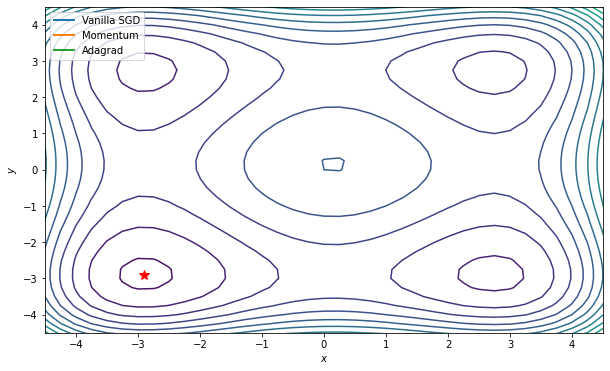

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=20)
ax.plot(*optimum, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=['Vanilla SGD', 'Momentum', 'Adagrad'], ax=ax)

ax.legend(loc='upper left')

In [23]:
HTML(anim.to_html5_video())